In [9]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd

cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [10]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [11]:
data = DecisionTreeClassifier(max_depth = 4)
data.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [12]:
data.predict(x_test)

array([1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1])

In [13]:
test_accuracy = data.score(x_test, y_test) #test 정확도
train_accuracy = data.score(x_train, y_train) # 훈련정확도
print('훈련정확도는', train_accuracy, '테스트정확도는', test_accuracy)

훈련정확도는 0.9824175824175824 테스트정확도는 0.9473684210526315


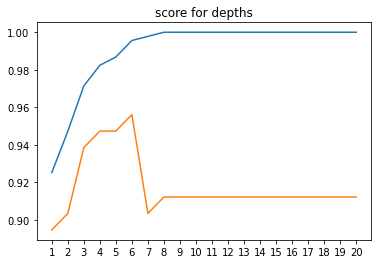

In [14]:
train_score=[]
test_score=[]
for i in range(1,21):
    model=DecisionTreeClassifier(max_depth=i,random_state=4)
    model.fit(x_train,y_train)
    train_score.append(model.score(x_train,y_train))
    test_score.append(model.score(x_test,y_test))
plt.figure()
plt.title('score for depths')
plt.plot(range(1,21),train_score)
plt.plot(range(1,21),test_score)
plt.xticks(range(1,21))
plt.show()

C:\Users\Joo\AppData\Local\Temp\ipykernel_14924\3435090659.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


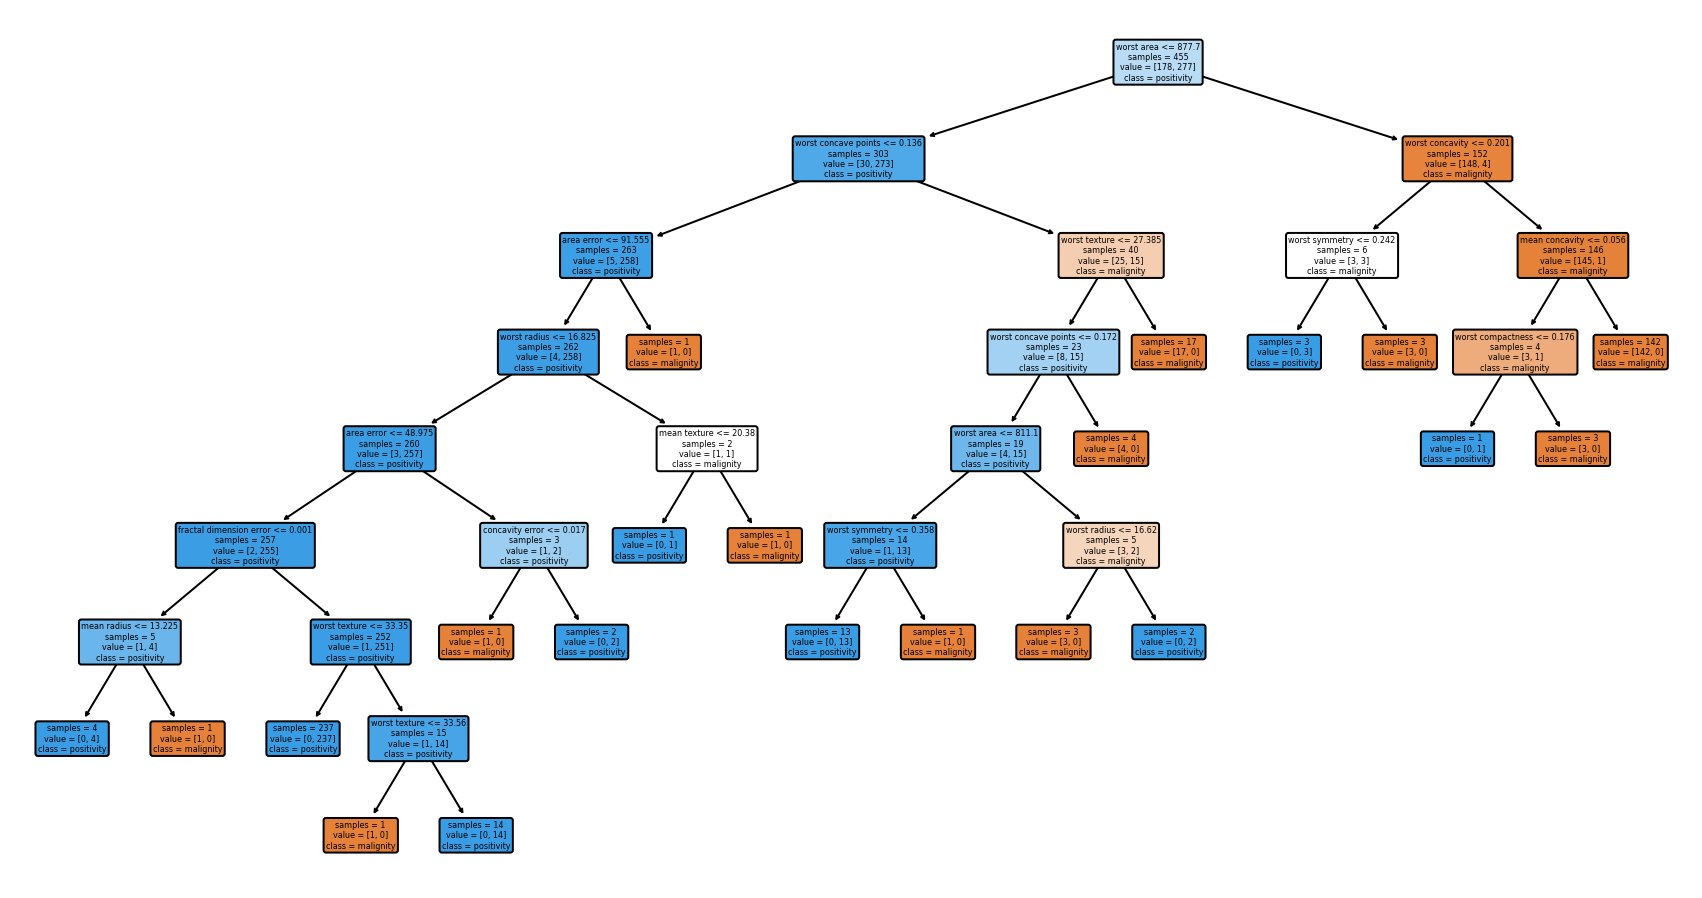

In [15]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")
plt.rcParams['figure.figsize'] = [15,8]

plot_tree(model, class_names=["malignity", "positivity"], feature_names=cancer_data.feature_names,
         impurity=False, filled=True, rounded=True, fontsize=4)

plt.show()

In [19]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer

In [22]:
scaler_Rob = RobustScaler()
scaler_Rob.fit(x_train)

RobustScaler()

In [25]:
x_scaled_Rob_train = scaler_Rob.transform(x_train)
x_scaled_Rob_test = scaler_Rob.transform(x_test)

In [26]:
scaled_Rob_model = DecisionTreeClassifier(max_depth = 4, random_state = 5)
scaled_Rob_model.fit(x_scaled_Rob_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [29]:
x_scaled_Rob_train.min(axis = 0)

array([-1.48942529, -1.62334218, -1.42360656, -1.12549073, -2.39967374,
       -1.18549512, -0.62858778, -0.63228899, -1.86725664, -1.4866582 ,
       -0.8099356 , -1.12093096, -0.884862  , -0.66989543, -1.56173261,
       -0.97612403, -1.05620233, -1.65731995, -1.36590909, -0.99590489,
       -1.16207455, -1.57913456, -1.12957514, -0.8651468 , -2.22531646,
       -0.99798865, -0.8619403 , -1.02846741, -1.87712805, -1.25501002])

In [30]:
x_scaled_Rob_train.max(axis = 0)

array([ 3.2091954 ,  3.60565871,  3.26852459,  5.25734398,  3.62370854,
        3.33984193,  3.44121293,  2.93920298,  3.65781711,  4.33163914,
        8.15234591,  5.99465325,  9.0917201 , 18.97413319,  8.47135061,
        5.90490956, 14.8410277 ,  6.13341204,  5.3989899 , 11.71730515,
        3.39384117,  2.86899822,  3.59656349,  5.98065113,  3.25135624,
        4.31768953,  3.50373134,  1.90726602,  4.35381199,  6.38326653])

In [40]:
scaler_Nor = Normalizer()
scaler_Nor.fit(x_train)

Normalizer()

In [41]:
x_scaler_Nor_train = scaler_Nor.transform(x_train)
x_scaler_Nor_test = scaler_Nor.transform(x_test)

In [42]:
scaler_Nor_model = DecisionTreeClassifier(max_depth = 4, random_state = 5)
scaler_Nor_model.fit(x_scaler_Nor_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=5)

In [44]:
x_scaler_Nor_train.min(axis = 0)

array([5.51189319e-03, 4.56825580e-03, 3.63962422e-02, 3.76233264e-01,
       2.17902707e-05, 2.37805701e-05, 0.00000000e+00, 0.00000000e+00,
       4.14296567e-05, 1.13032004e-05, 1.42282380e-04, 2.22630519e-04,
       9.18063532e-04, 1.20379454e-02, 1.17600717e-06, 2.76335624e-06,
       0.00000000e+00, 0.00000000e+00, 3.33747542e-06, 5.12412074e-07,
       7.24466195e-03, 6.16950010e-03, 5.04955350e-02, 6.96047105e-01,
       2.72780418e-05, 4.21129601e-05, 0.00000000e+00, 0.00000000e+00,
       5.30886576e-05, 1.49295517e-05])

In [46]:
x_scaler_Nor_train.max(axis = 0)

array([2.84700680e-02, 8.66088059e-02, 1.78585343e-01, 6.96047105e-01,
       4.77151978e-04, 5.57043269e-04, 8.25977854e-04, 1.60675994e-04,
       7.87096852e-04, 3.18835398e-04, 1.65778661e-03, 1.13783731e-02,
       1.07454414e-02, 1.08991557e-01, 6.14437683e-05, 2.42624716e-04,
       7.96220132e-04, 1.06142578e-04, 1.81992000e-04, 5.99980019e-05,
       3.23403007e-02, 1.08567406e-01, 2.05583173e-01, 9.21243290e-01,
       6.45990370e-04, 1.47441480e-03, 1.65195571e-03, 3.96782489e-04,
       1.19573470e-03, 4.44506641e-04])

# Unsuoervised Learning 

In [50]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()

X = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names) # input data
y = pd.DataFrame(cancer_data.target, columns=['class']) # target data

In [51]:
# scale 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

x_scaled = scaler.transform(X)

In [53]:
#주성분 분석으로 변환 
from sklearn.decomposition import PCA
pca = PCA(n_components =2) #n_components = 주성분의 개수 
pca.fit(x_scaled)
x_scaled_pca = pca.transform(x_scaled)


<AxesSubplot:xlabel='X', ylabel='Y'>

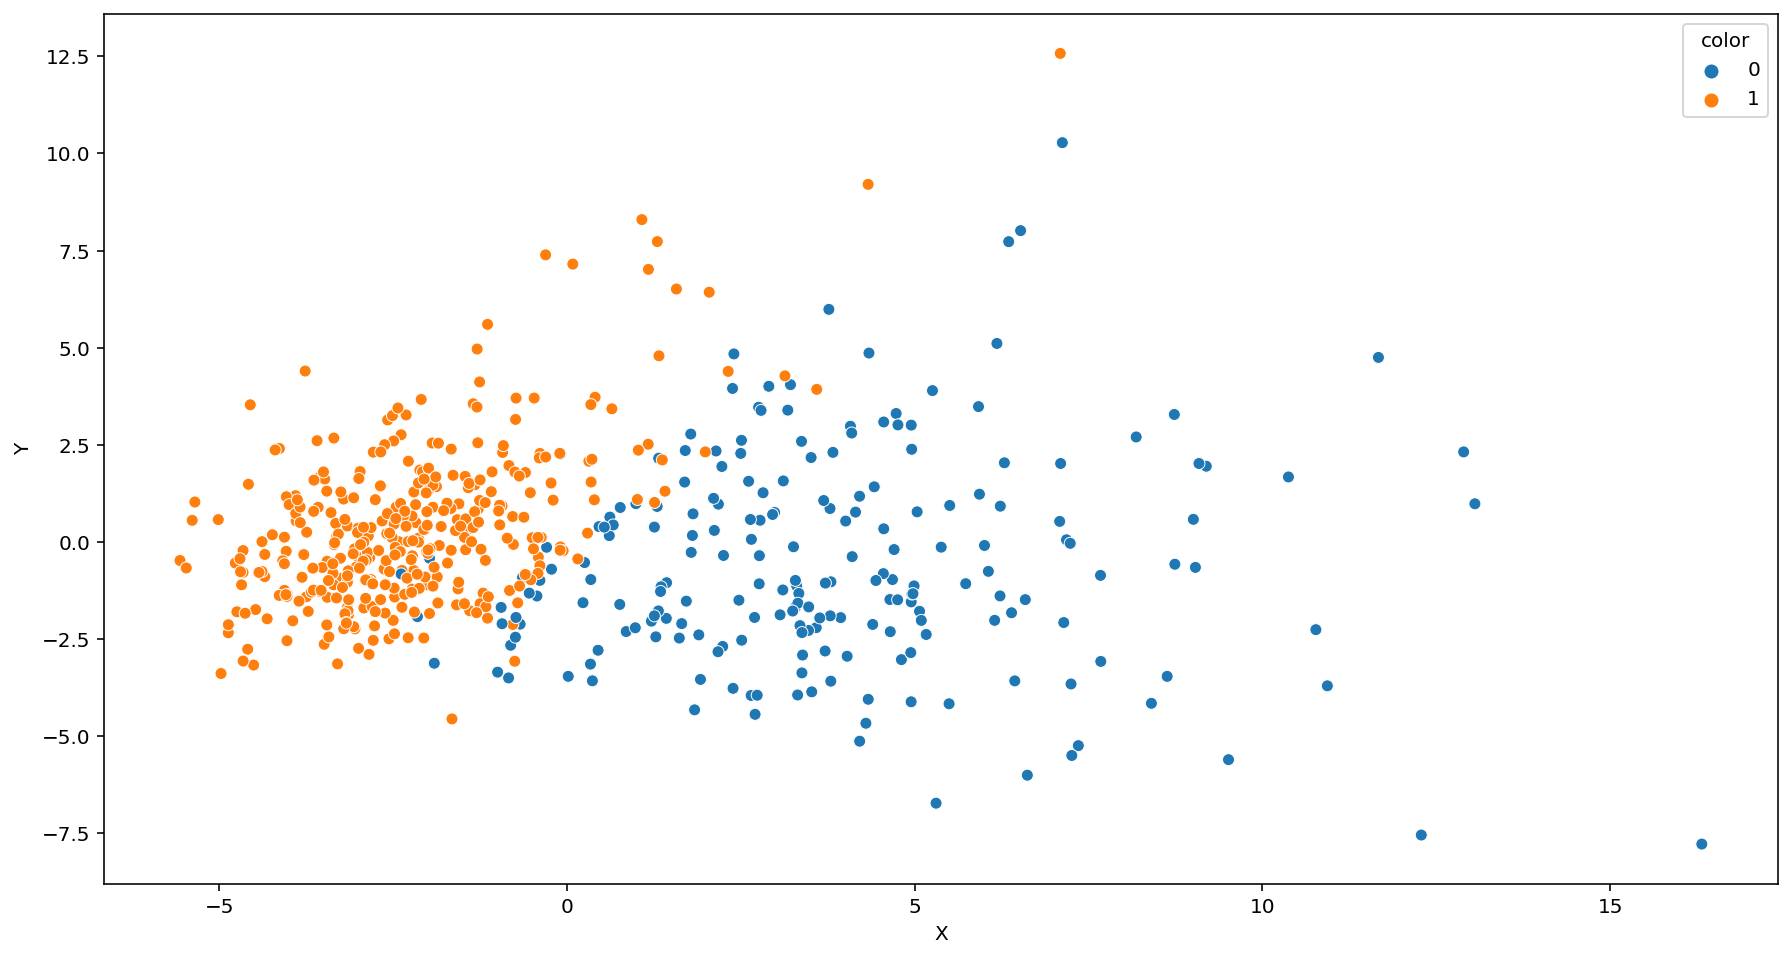

In [54]:
# 칼럼이름을 X,Y로 지정을하고 주성분 변환이 된 데이터들을 데이터 프레임으로 생성
df = pd.DataFrame(x_scaled_pca, columns = ['X','Y'])

# 양성과 악성의 색상을 구분하기 위해 y데이터 들을 color 이름의 칼럼에 넣습니다.
df['color'] = y
import seaborn as sns

# scatterplot을 그립니다.
sns.scatterplot(data = df, x = 'X', y ='Y', hue = 'color')

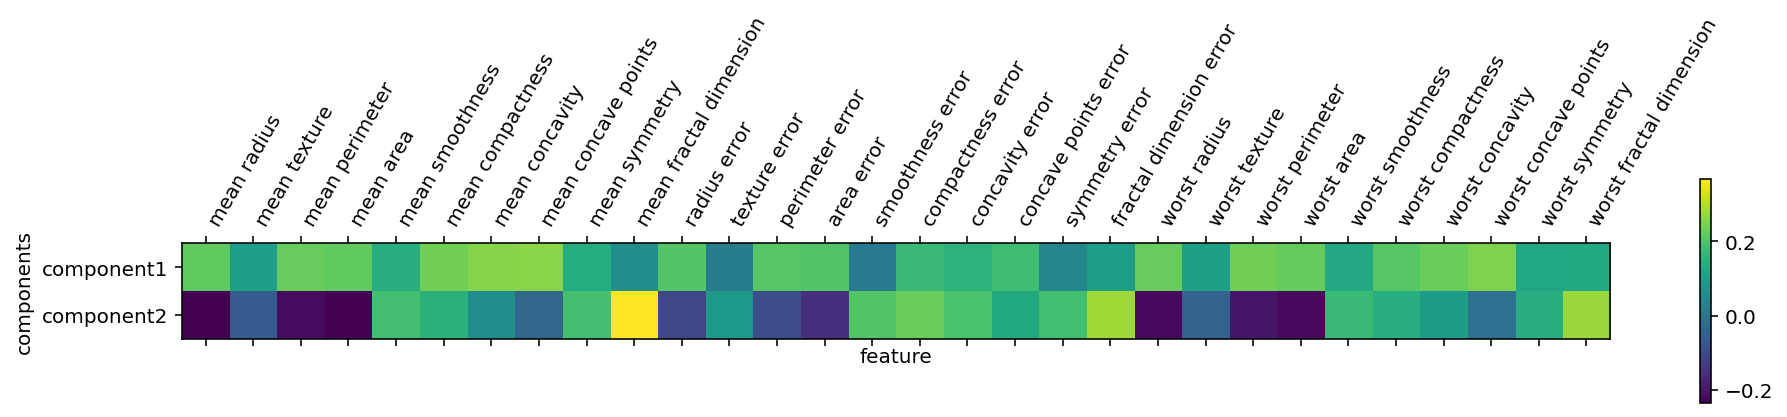

In [55]:
import matplotlib.pyplot as plt
plt.matshow(pca.components_, cmap = 'viridis')
plt.yticks([0,1], ['component1', 'component2'])
plt.colorbar()
plt.xticks(range(len(X.columns)),
          X.columns, rotation = 60, ha = 'left')
plt.xlabel('feature')
plt.ylabel('components')
plt.show()

# 군집

In [60]:
# 데이터 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

In [61]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(100, 2)
(100,)


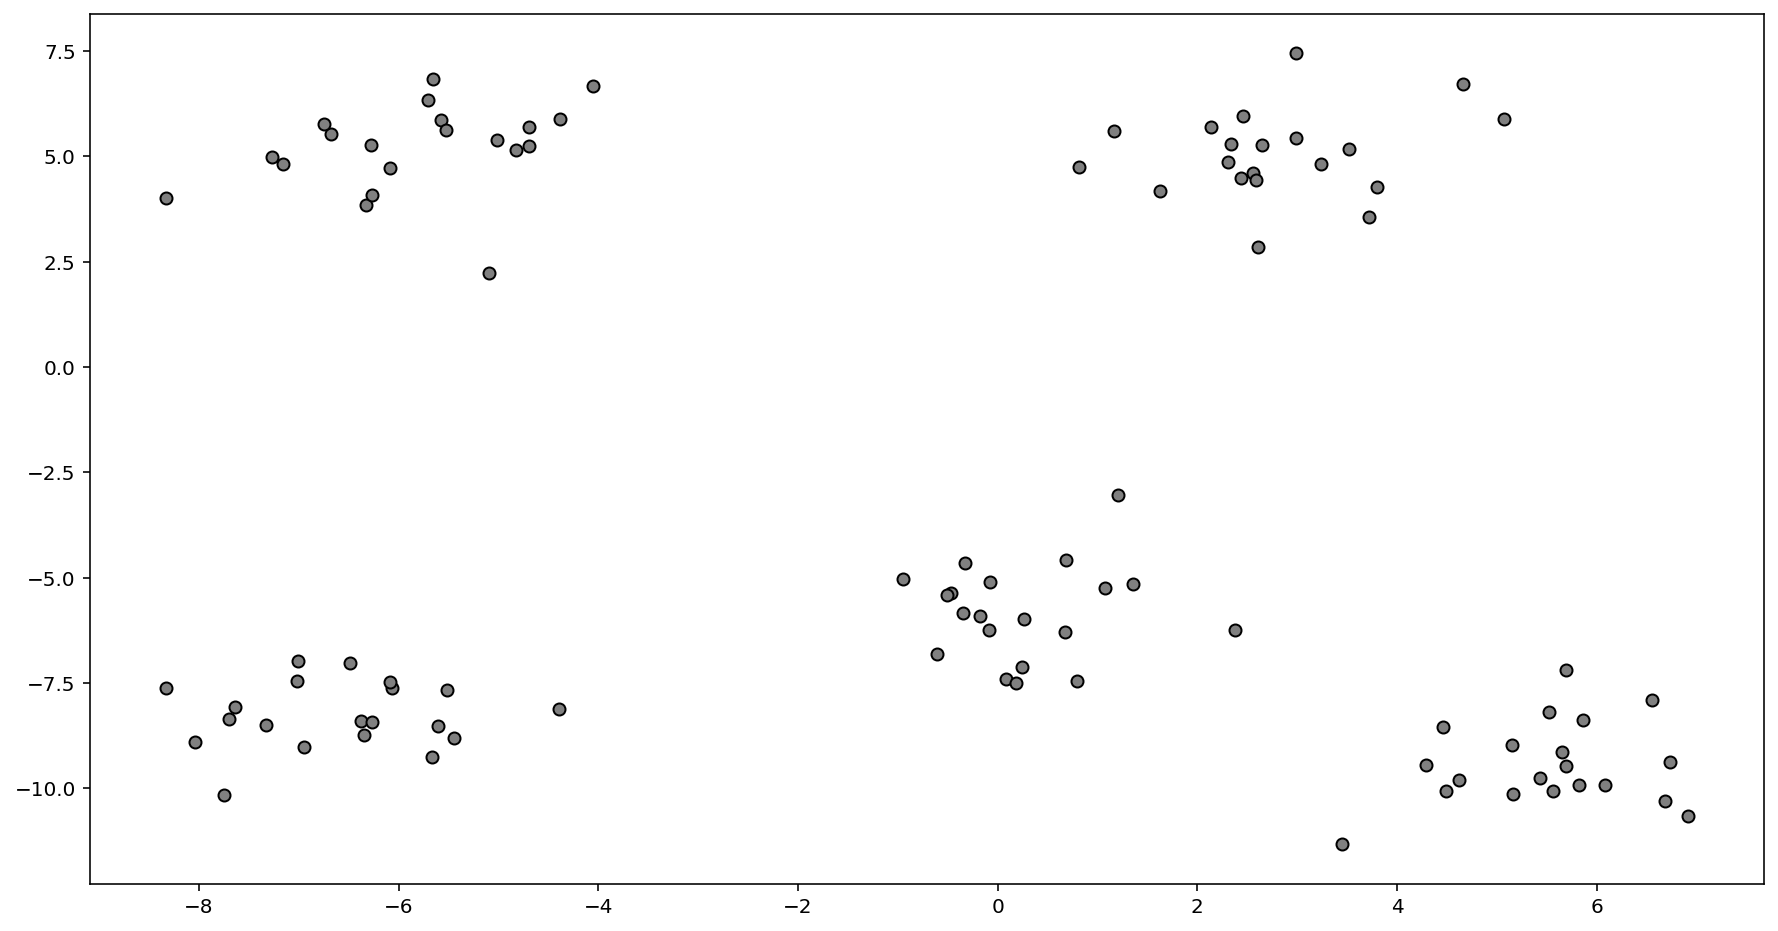

In [62]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [63]:
from sklearn.cluster import KMeans

kmc = KMeans(n_clusters = 5, random_state = 0)
kmc.fit(X)

label_kmc = kmc.labels_
print(label_kmc)

[3 1 0 2 4 3 3 0 4 3 0 3 4 2 4 3 1 2 4 3 3 2 1 0 3 3 2 4 0 1 2 2 4 2 3 4 0
 2 0 1 2 2 2 4 0 0 3 4 1 4 1 4 3 0 4 4 2 1 2 0 4 1 1 2 3 1 4 1 4 0 0 3 1 4
 2 2 0 1 3 3 4 4 1 2 1 0 2 0 2 0 1 0 3 1 1 1 0 3 3 0]


In [64]:
# 시각화를 위한 데이터프레임 생성
import pandas as pd
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(X, columns=kmc_columns)
X_kmc_df['target'] = y
X_kmc_df['label_kmc'] = label_kmc
X_kmc_df.head(5)

,kmc_comp1,kmc_comp2,target,label_kmc
0,-5.577854,5.872988,3,3
1,1.627832,4.178069,1,1
2,-6.950884,-9.024594,4,0
3,-0.952769,-5.034316,2,2
4,6.550104,-7.912339,0,4


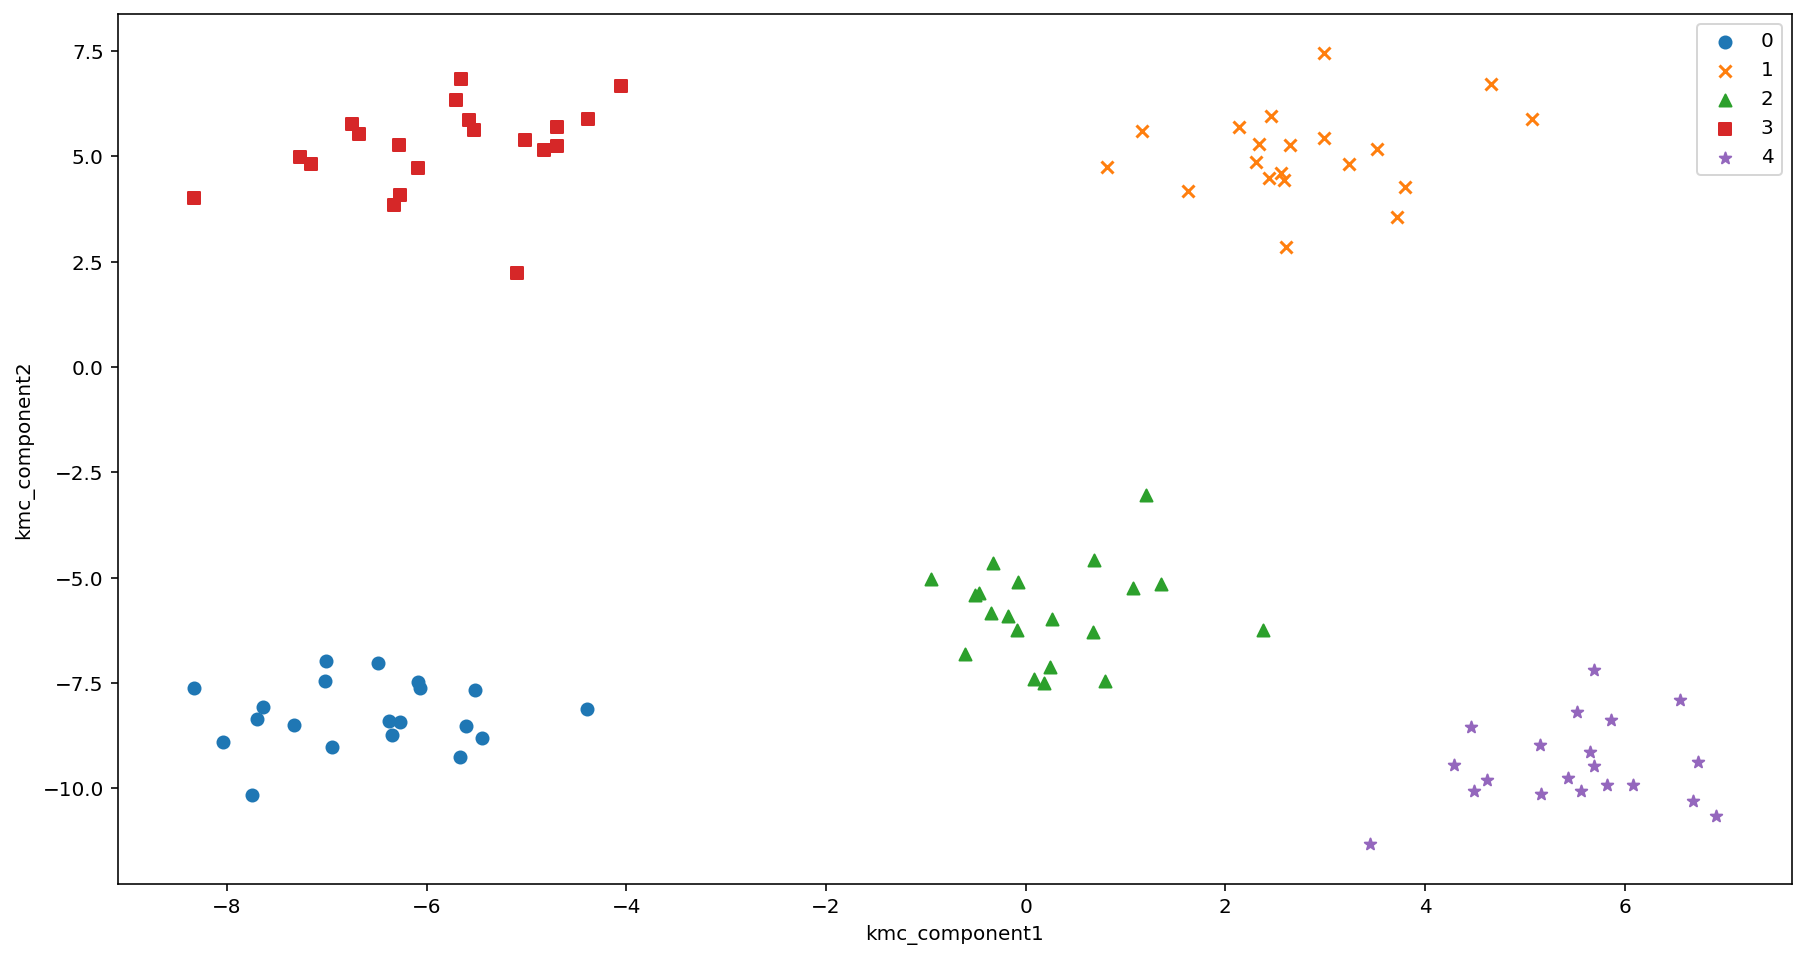

In [65]:
# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

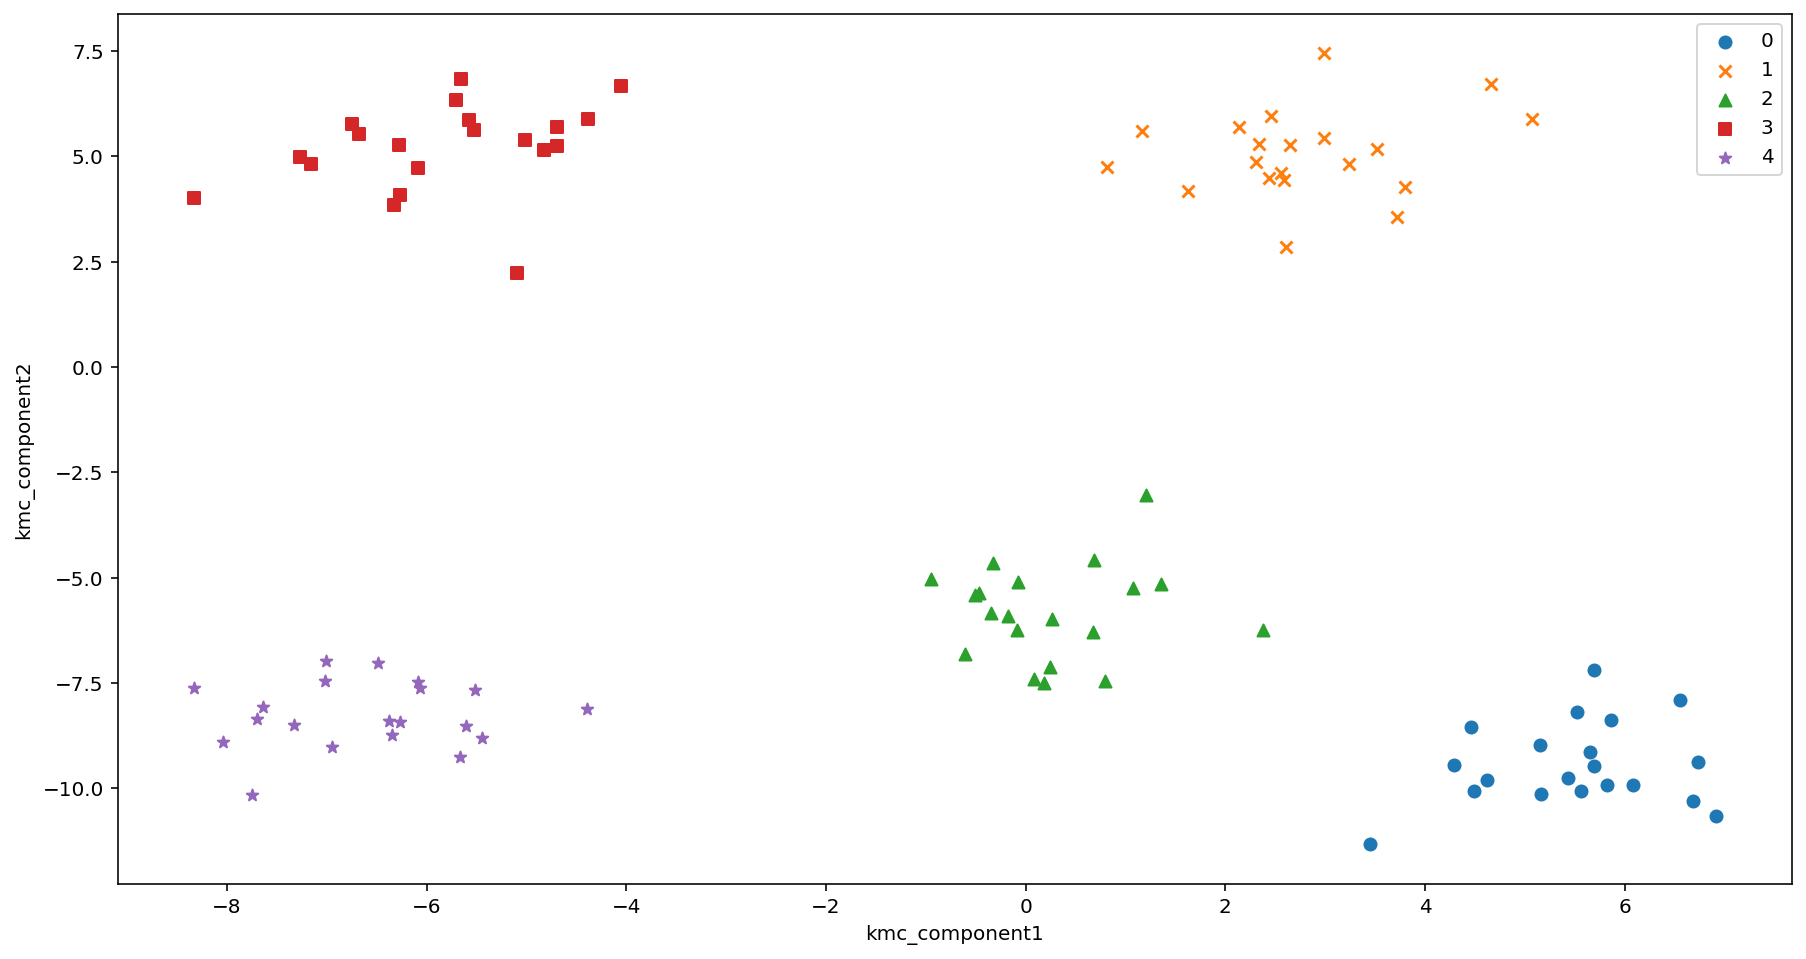

In [66]:
# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^','s','*']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

In [67]:
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

iris_data = load_iris()
X = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
Y = pd.DataFrame(iris_data.target, columns = ['class'])

In [89]:
# 1.스케일 변환
scaler = StandardScaler()
scaler.fit(X)

x_scaled = scaler.transform(X)
print(f"스케일 변환 뒤 데이터 모양은 {x_scaled.shape}")

# 2.스케일 변환 된 것을 주성분 분석으로 2차원으로 수정
pca = PCA(n_components =2)
pca.fit(x_scaled)
x_scaled_pca = pca.transform(x_scaled)
print(f"주성분 분석으로 활용한 차원 축소 후 데이터 모양 {x_scaled_pca.shape}")

# 3.주성분 분석으로 2차원 변횐 된 것을 k-means clustering을 활용해서 군집을 3개 생성
kmc = KMeans(n_clusters = 3, random_state = 0)
kmc.fit(x_scaled_pca)

label_kmc = kmc.labels_
print(f'k-means clustering 결과 : {label_kmc.shape}개 데이터 생성')
# 4.실제 real data와 군집으로 생성된 label 비교
kmc_columns = ['kmc_comp1', 'kmc_comp2']
X_kmc_df = pd.DataFrame(x_scaled_pca, columns=kmc_columns)
X_kmc_df['target'] = Y
X_kmc_df['label_kmc'] = label_kmc
print(f"실제 클러스터의 군집 이름 : {X_kmc_df['target'].unique()}")
print(f"k-means 클러스터의 군집 이름 : {X_kmc_df['label_kmc'].unique()}")

스케일 변환 뒤 데이터 모양은 (150, 4)
주성분 분석으로 활용한 차원 축소 후 데이터 모양 (150, 2)
k-means clustering 결과 : (150,)개 데이터 생성
실제 클러스터의 군집 이름 : [0 1 2]
k-means 클러스터의 군집 이름 : [0 2 1]


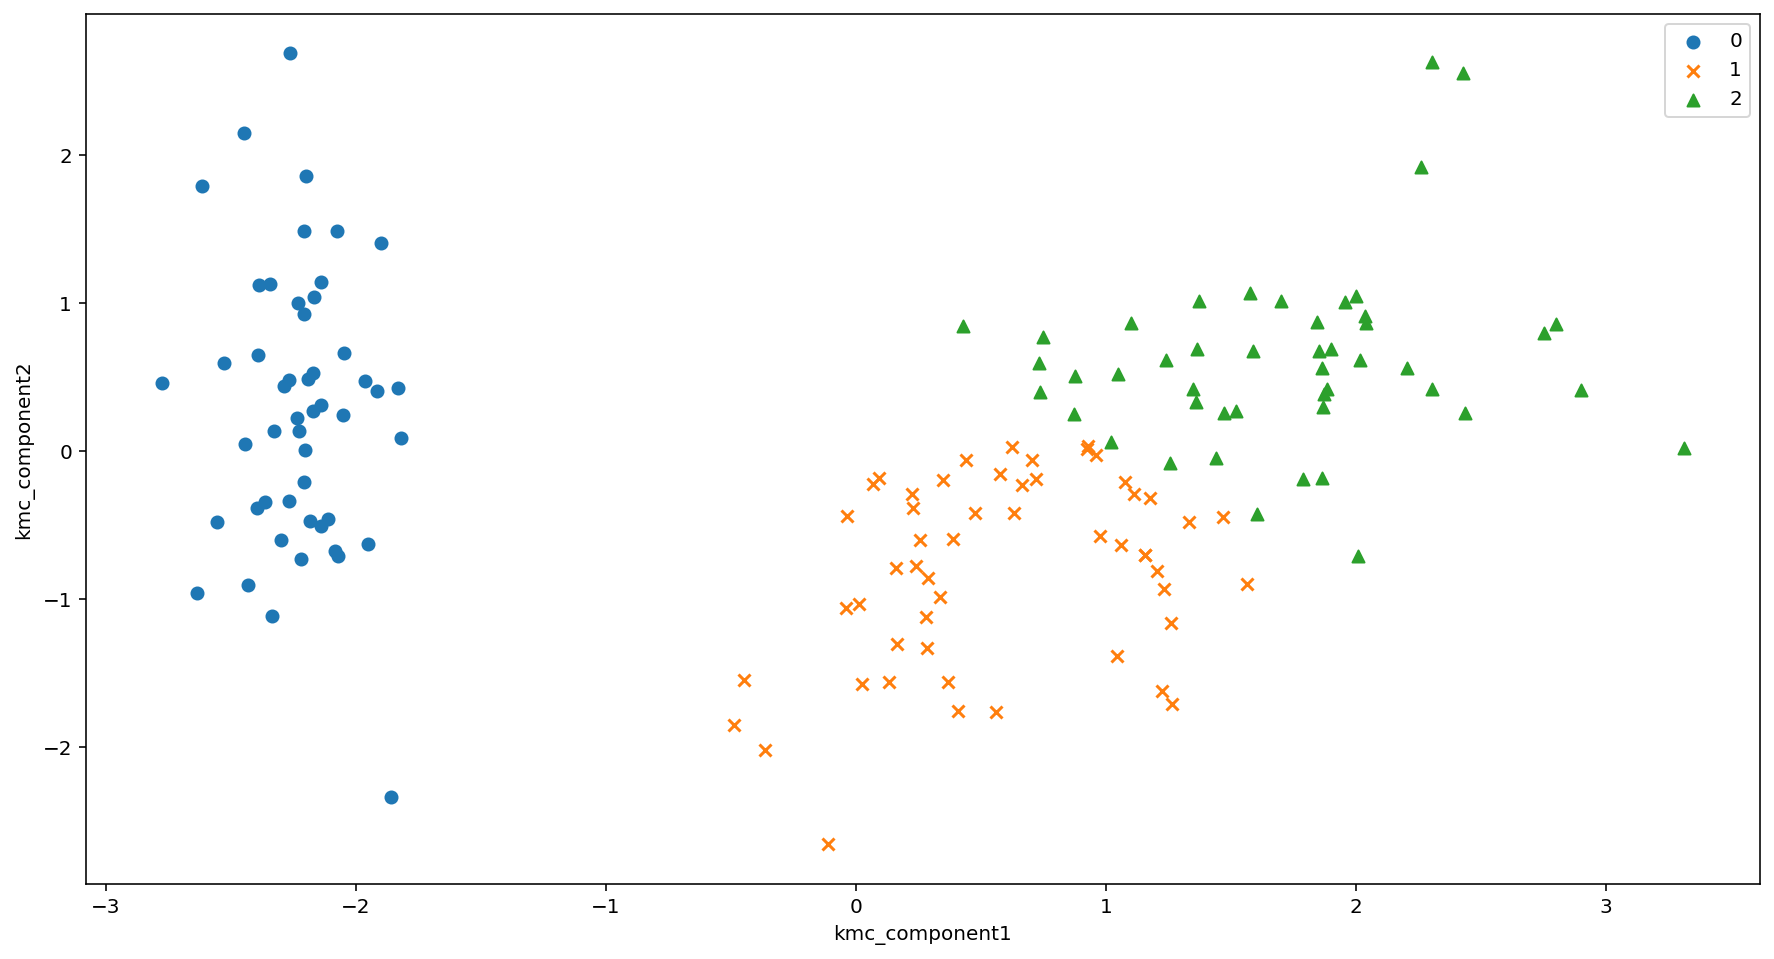

In [75]:
# k-means clustering을 이용한 데이터 플랏
df = X_kmc_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['label_kmc']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

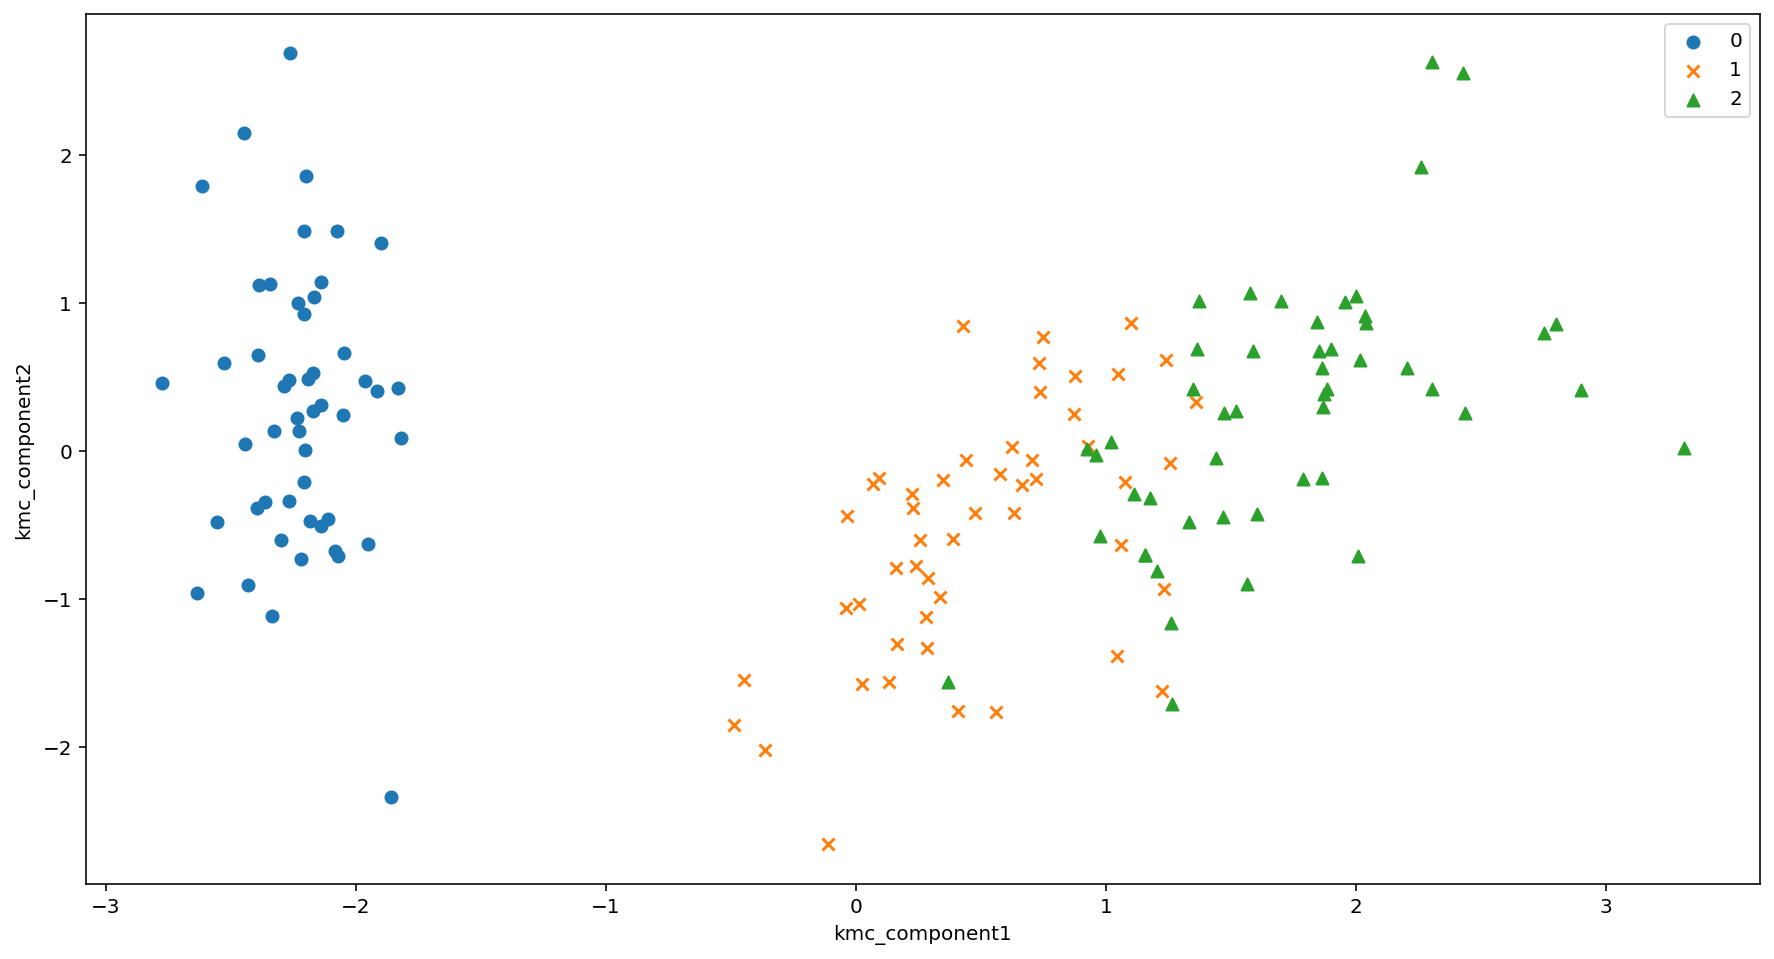

In [76]:
# 실제 타겟 플랏
df = X_kmc_df
markers=['o','x','^']

for i, mark in enumerate(markers):
    df_i = df[df['target']==i]
    target_i = i
    X1 = df_i['kmc_comp1']
    X2 = df_i['kmc_comp2']
    plt.scatter(X1, X2, 
                marker=mark, 
                label=target_i)

plt.xlabel('kmc_component1')
plt.ylabel('kmc_component2')
plt.legend()
plt.show()

# DBSCAN 

In [90]:
# 데이터 생성
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=300, 
                 noise=0.05 ,
                 random_state=0)

In [91]:
# 생성된 데이터 차원 확인
print(X.shape)
print(y.shape)

(300, 2)
(300,)


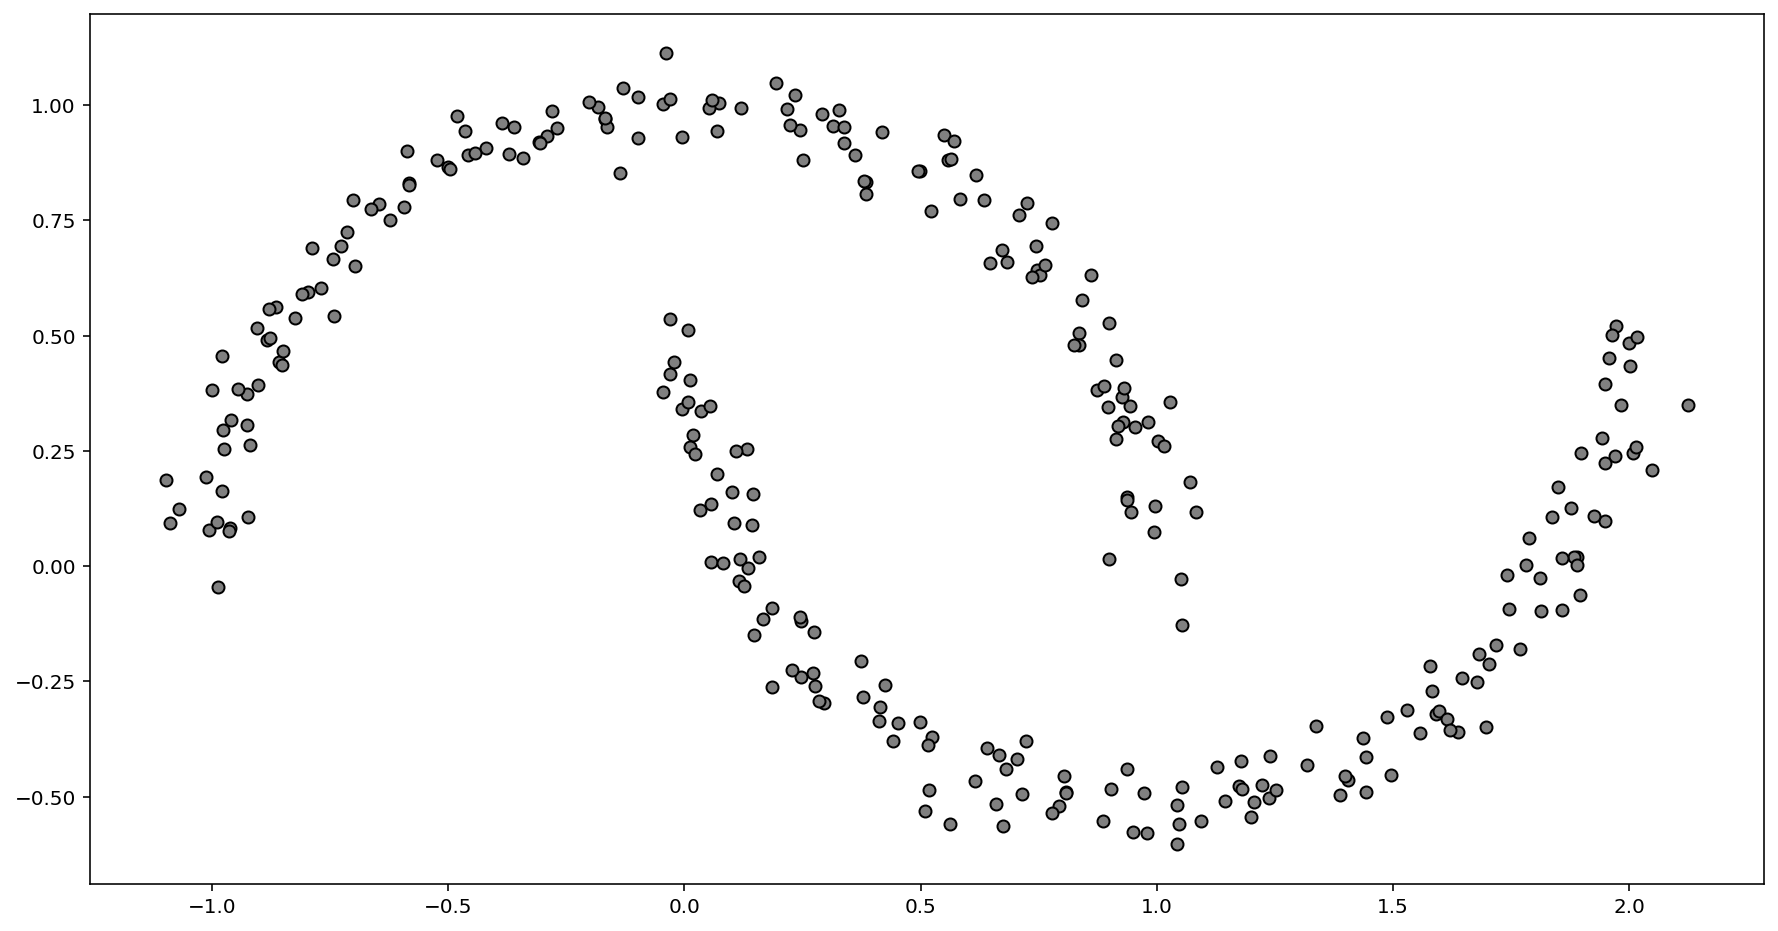

In [92]:
# 라벨링 되지 않은 데이터 플랏
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], 
            c='gray', 
            edgecolor='black', 
            marker='o')
plt.show()

In [104]:
# DBSCAN
# 35분 까지 아래의 데이터를 가지고 DBSCAN 군집을 생성해보세요!
# 중심이 5개인 임의의 데이터 생성
from sklearn.datasets import make_blobs
X,y = make_blobs(n_samples=100, 
                 n_features=2, 
                 centers=5, 
                 random_state=10)

# DBSCAN
from sklearn.cluster import DBSCAN
dbs = DBSCAN(min_samples = 3, eps=2)
dbs.fit(X)
label_dbs = dbs.labels_
print(label_dbs)

# 시각화를 위한 데이터프레임 생성
import pandas as pd
dbs_columns = ['dbs_comp1', 'dbs_comp2']
X_dbs_df = pd.DataFrame(X, columns=dbs_columns)
X_dbs_df['target'] = y
X_dbs_df['label_dbs'] = label_dbs
print(X_dbs_df.head(5))

# 타겟 클래스 종류 확인
print(set(X_dbs_df['target']))
print(set(X_dbs_df['label_dbs']))

[ 0  1  2  3  4  0  0  2  4  0  2  0  4  3  4  0  1  3  4  0  0  3  1  2
  0  0  3  4  2  1  3  3  4  3  0  4  2  3  2  1  3  3  3  4  2  2  0  4
  1  4  1  4  0  2  4  4  3  1  3  2  4  1  1  3  0  1  4  1  4  2  2  0
  1  4  3  3  2  1  0  0  4  4  1  3  1  2  3  2  3  2  1  2  0  1  1  1
  2  0 -1  2]
   dbs_comp1  dbs_comp2  target  label_dbs
0  -5.577854   5.872988       3          0
1   1.627832   4.178069       1          1
2  -6.950884  -9.024594       4          2
3  -0.952769  -5.034316       2          3
4   6.550104  -7.912339       0          4
{0, 1, 2, 3, 4}
{0, 1, 2, 3, 4, -1}


In [99]:
import plotly.express as px
X_dbs_df['label_dbs'] = X_dbs_df['label_dbs'].astype(str)
fig = px.scatter(X_dbs_df, x="dbs_comp1", y="dbs_comp2", color='label_dbs')
fig.show()

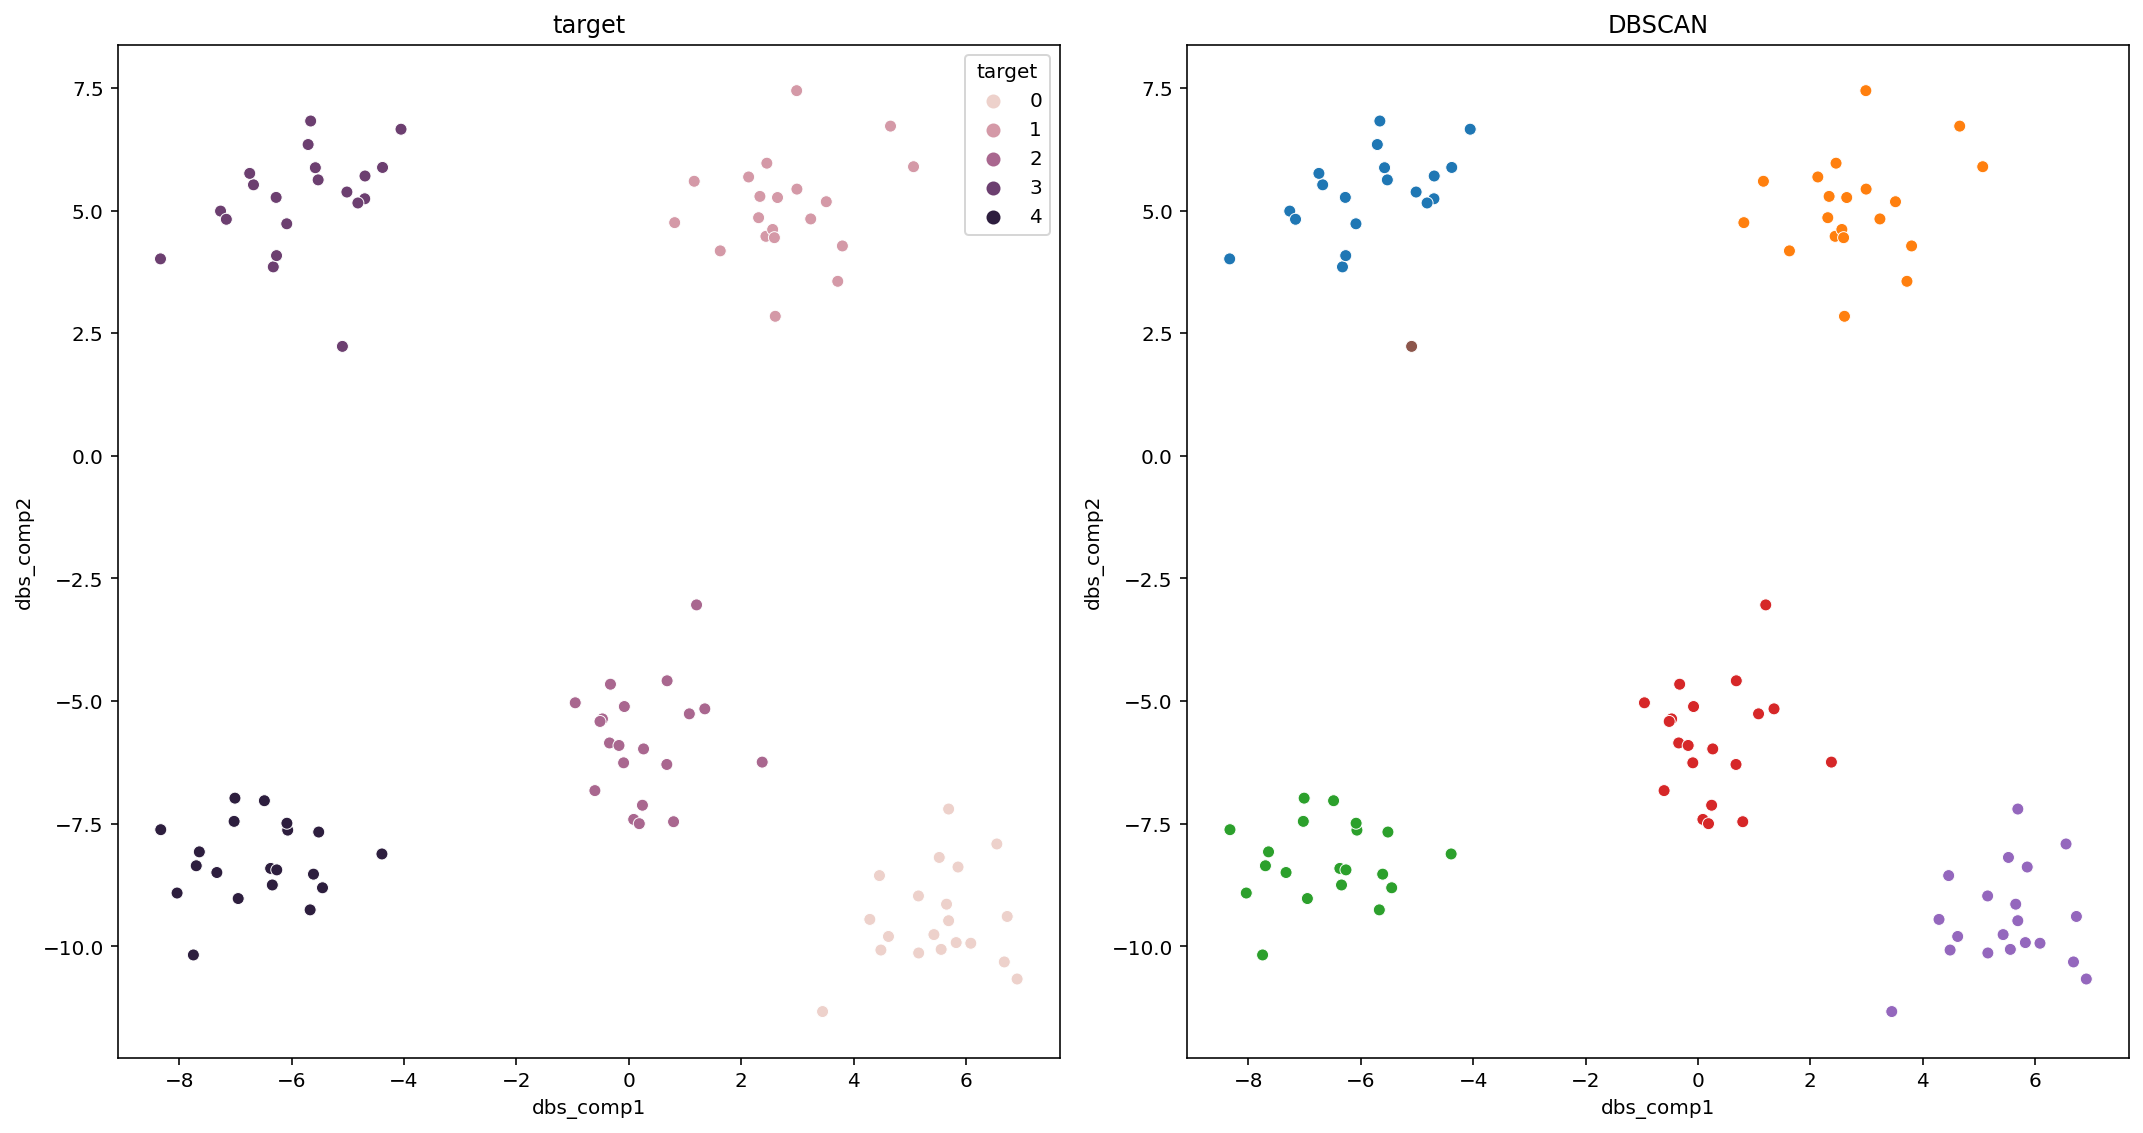

In [100]:
fig, axes = plt.subplots(1, 2)
sns.scatterplot(
    data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'target', ax = axes[0]
    ).set(title='target')
sns.scatterplot(
    data = X_dbs_df, x = 'dbs_comp1', y = 'dbs_comp2', hue = 'label_dbs', ax = axes[1]
    ).set(title='DBSCAN')
fig.tight_layout()
plt.legend([],[], frameon=False)
